**Mobile phone price range prediction - Classification Problem - XGBoost**

To learn more about XGboost - https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

*I wanted to learn XGBoost technique which has become a state of the art machine learning model for both Classification and Regression for a lot of problems*

Hence, I used this simple dataset to explore how it compares with other models (from other kernels where highest accuracy is 91%)

Just a gist of the data again 

id:ID
battery_power:Total energy a battery can store in one time measured in mAh
blue:Has bluetooth or not
clock_speed:speed at which microprocessor executes instructions
dual_sim:Has dual sim support or not
fc:Front Camera mega pixels
four_g:Has 4G or not
int_memory:Internal Memory in Gigabytes
m_dep:Mobile Depth in cm
mobile_wt:Weight of mobile phone
n_cores:Number of cores of processor
pc:Primary Camera mega pixels
px_height:Pixel Resolution Height
px_width:Pixel Resolution Width
ram:Random Access Memory in Megabytes
sc_h:Screen Height of mobile in cm
sc_w:Screen Width of mobile in cm
talk_time:longest time that a single battery charge will last when you are
three_g:Has 3G or not
touch_screen:Has touch screen or not
wifi:Has wifi or not




In [1]:
#Importing the necessary packages  

import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from graphviz import *

In [2]:
#Reading the data
data = pd.read_csv('train.csv')
#Splitting into X and y as per the required for Scikit learn packages
X, y = data.iloc[:,:-1], data.iloc[:,-1]

#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)


In [3]:
#Using the XGBoost Classifier. I have used just a few combinations here and there without GridSearch or RandomSearch because the dataset was pretty small
xg_cl = xgb.XGBClassifier(objective='multi:softmax', n_estimators=200,seed=123,learning_rate=0.15,max_depth=5,colsample_bytree=0.75,subsample=0.75)

**Explaining the parameters**

* Objective - what is your objective for this particular problem, here we are having a multiclass classficiation problem hence multi softmax
* n_estimators - number of trees we are using for classification problem 
* learning_rate - how big a step to take
* max_depth - maximum depth of each trees
* colsample_bytree - how much percent of the features to be by each tree
* subsample - How much percent of the data used by each tree




In [4]:
#fitting the model
xg_cl.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0, learning_rate=0.15,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=123, silent=True,
       subsample=0.75)

In [5]:
preds = xg_cl.predict(X_test)

In [6]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.935000


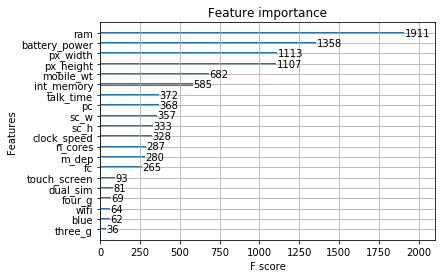

In [7]:
#XGBoost in the package itself gives us the feature importance to understand how each features compares
xgb.plot_importance(xg_cl)
plt.show()

As you can see (and as well all do), RAM and Battery Power play a very important role in the total pricing of the phone and since most phone already have 3G it doesnt seem to have that much effect on the total pricing
